<a href="https://colab.research.google.com/github/Zeeshan-ctr/ZeeshanTheAnalyst/blob/main/stress_prediction_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [12]:
from google.colab import files
uploaded=files.upload()

Saving Stress.csv to Stress (2).csv


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [18]:
data.isnull().sum()

,0
subreddit,0
post_id,0
sentence_range,0
text,0
label,0
confidence,0
social_timestamp,0


In [14]:
data=pd.read_csv("Stress.csv")

In [15]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [26]:
x=data.text
y=data.label
tfidf_v=TfidfVectorizer()
x = tfidf_v.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,
                                                 random_state=40,stratify=y)
y_test

,label
2349,0
2646,1
390,1
496,1
66,0
...,...
806,1
767,1
2123,1
426,1


In [27]:
print(y_test.value_counts())

label
1    491
0    446
Name: count, dtype: int64


In [28]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [30]:
y_pred = model.predict(x_test)


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       446
           1       0.71      0.82      0.76       491

    accuracy                           0.73       937
   macro avg       0.74      0.73      0.73       937
weighted avg       0.74      0.73      0.73       937



In [32]:
MN = MultinomialNB()
MN.fit(x_train,y_train)
y_pred = MN.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55       446
           1       0.63      0.94      0.76       491

    accuracy                           0.68       937
   macro avg       0.75      0.67      0.65       937
weighted avg       0.74      0.68      0.66       937



In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       446
           1       0.77      0.73      0.75       491

    accuracy                           0.74       937
   macro avg       0.74      0.74      0.74       937
weighted avg       0.74      0.74      0.74       937



In [36]:
Xg = XGBClassifier()
Xg.fit(x_train,y_train)
y_predict=Xg.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       446
           1       0.70      0.72      0.71       491

    accuracy                           0.69       937
   macro avg       0.69      0.69      0.69       937
weighted avg       0.69      0.69      0.69       937



The dataset I am using for this task contains subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress.

In [19]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):                                       # function for cleaning the text column
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3047880185.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/tmp/ipython-input-3047880185.py:7: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/tmp/ipython-input-3047880185.py:11: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


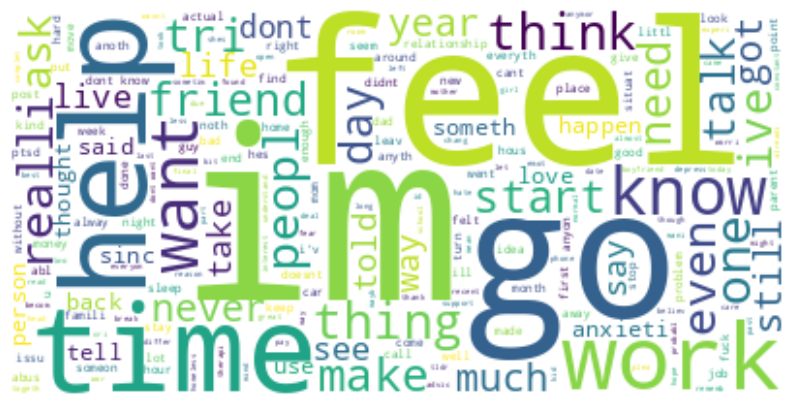

In [20]:
text= " ".join(i for i in data.text)
stopwords= set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure (figsize=(10,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by visualizing a word cloud of the text column.